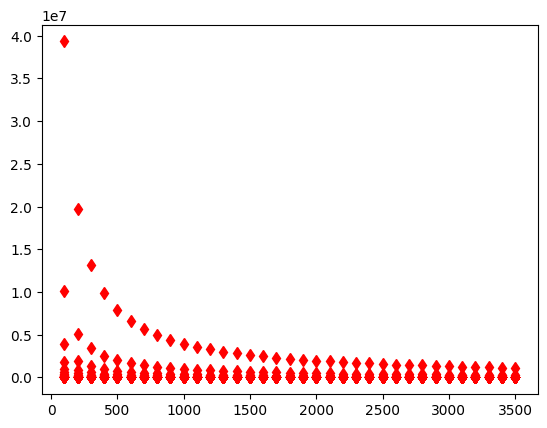

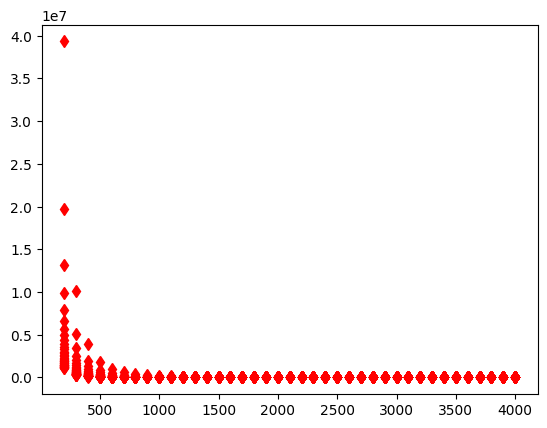

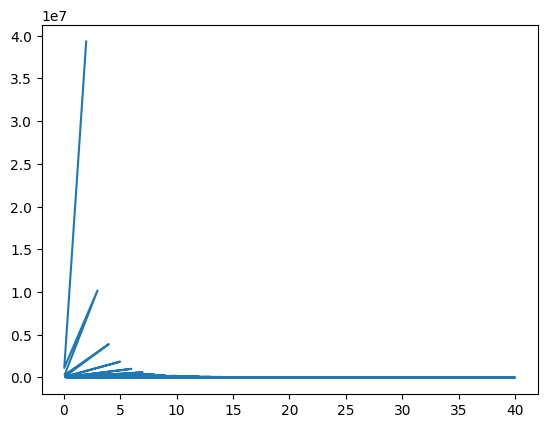

In [91]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras import layers
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, Normalization
from keras import Model

np.set_printoptions(precision=3, suppress=True)
test_train= pd.read_csv("./data/first.csv" , names=["Fr","n","LifeTime"], skiprows=1)
plt.plot(test_train["n"], test_train["LifeTime"], "rd")
plt.show()
plt.plot(test_train["Fr"], test_train["LifeTime"], "rd")
plt.show()
plt.plot(test_train["Fr"]/test_train["n"], test_train["LifeTime"])
plt.show()

# Korellation

Desto höher die Drehzahl, sowie die Kraft der Belastung desto kürzer ist die Lebensdauer.


In [92]:
test_features = test_train.copy()
test_labels = test_features.pop("LifeTime")
test_features = np.array(test_features)
test_labels

0       3.931553e+07
1       1.965777e+07
2       1.310518e+07
3       9.828883e+06
4       7.863106e+06
            ...     
1360    5.840309e+01
1361    5.657799e+01
1362    5.486350e+01
1363    5.324987e+01
1364    5.172845e+01
Name: LifeTime, Length: 1365, dtype: float64

In [93]:
test_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)

])

test_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                   optimizer= tf.keras.optimizers.Adam())

In [94]:
test_model.fit(test_features,test_labels, epochs=10)

Epoch 1/10
43/43 [==============================] - 0s 631us/step - loss: 1977448529920.0000
Epoch 2/10
43/43 [==============================] - 0s 595us/step - loss: 1977227149312.0000
Epoch 3/10
43/43 [==============================] - 0s 560us/step - loss: 1976966316032.0000
Epoch 4/10
43/43 [==============================] - 0s 560us/step - loss: 1976690671616.0000
Epoch 5/10
43/43 [==============================] - 0s 571us/step - loss: 1976400609280.0000
Epoch 6/10
43/43 [==============================] - 0s 560us/step - loss: 1976100454400.0000
Epoch 7/10
43/43 [==============================] - 0s 560us/step - loss: 1975807901696.0000
Epoch 8/10
43/43 [==============================] - 0s 560us/step - loss: 1975508795392.0000
Epoch 9/10
43/43 [==============================] - 0s 583us/step - loss: 1975225942016.0000
Epoch 10/10
43/43 [==============================] - 0s 571us/step - loss: 1974918971392.0000


In [95]:
normalize = layers.Normalization()
normalize.adapt(test_features)


In [96]:
norm_test_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_test_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_test_model.fit(test_features, test_labels, epochs=10)


Epoch 1/10
43/43 [==============================] - 0s 631us/step - loss: 1977551028224.0000
Epoch 2/10
43/43 [==============================] - 0s 607us/step - loss: 1977550241792.0000
Epoch 3/10
43/43 [==============================] - 0s 595us/step - loss: 1977549848576.0000
Epoch 4/10
43/43 [==============================] - 0s 595us/step - loss: 1977549193216.0000
Epoch 5/10
43/43 [==============================] - 0s 583us/step - loss: 1977548275712.0000
Epoch 6/10
43/43 [==============================] - 0s 583us/step - loss: 1977547620352.0000
Epoch 7/10
43/43 [==============================] - 0s 583us/step - loss: 1977546702848.0000
Epoch 8/10
43/43 [==============================] - 0s 559us/step - loss: 1977545654272.0000
Epoch 9/10
43/43 [==============================] - 0s 571us/step - loss: 1977544343552.0000
Epoch 10/10
43/43 [==============================] - 0s 560us/step - loss: 1977542377472.0000


In [98]:
norm_test_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_18 (Dense)            (None, 64)                192       
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 262
Trainable params: 257
Non-trainable params: 5
_________________________________________________________________
